In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score #For regression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score ,calinski_harabasz_score,davies_bouldin_score  #For clustering
import matplotlib.pyplot as plt

A1. If your project deals with a regression problem, please use one attribute of your dataset
(X_train) along with the target values (Y_train) for training a linear regression model. Sample code
suggested below.

In [2]:
data=pd.read_csv('Transformed_Housing_Data2.csv')
X=data[['No of Bedrooms']]
Y=data['Sale_Price']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3) #spliting the data into trainning(70%) and testing(30%)

reg = LR().fit(X_train , Y_train) # Trainning the meodel
Y_train_pred = reg.predict(X_train) #Apply the model on X_train to predict the values of Y_train

print(Y_train_pred)




[568798.84206334 568798.84206334 745030.93197112 ... 392566.75215556
 568798.84206334 568798.84206334]


A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.  
Perform prediction on the test data and compare the metric values between train and test set.

In [3]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mape = np.mean(np.abs((Y_train - Y_train_pred) / Y_train)) * 100
test_mape = np.mean(np.abs((Y_test - Y_test_pred) / Y_test)) * 100
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Print model coefficients and performance metrics
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Training MSE:", train_mse, "Testing MSE:", test_mse)
print("Training RMSE:", train_rmse, "Testing RMSE:", test_rmse)
print("Training MAPE:", train_mape, "Testing MAPE:", test_mape)
print("Training R^2 Score:", train_r2, "Testing R^2 Score:", test_r2)


Coefficients: [88116.04495389]
Intercept: 216334.66224777448
Training MSE: 55510565492.28697 Testing MSE: 54930918921.977036
Training RMSE: 235606.80272922292 Testing RMSE: 234373.4603618273
Training MAPE: 44.8761812305048 Testing MAPE: 46.17266422068724
Training R^2 Score: 0.11063381632997404 Testing R^2 Score: 0.12462610412725761


A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [4]:
X=data.drop(columns=['Sale_Price'])
Y=data['Sale_Price']
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3) #spliting the data into trainning(70%) and testing(30%)

reg = LR().fit(X_train , Y_train) # Trainning the meodel
Y_train_pred = reg.predict(X_train) #Apply the model on X_train to predict the values of Y_train

print(Y_train_pred)
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mape = np.mean(np.abs((Y_train - Y_train_pred) / Y_train)) * 100
test_mape = np.mean(np.abs((Y_test - Y_test_pred) / Y_test)) * 100
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

# Print model coefficients and performance metrics
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Training MSE:", train_mse, "Testing MSE:", test_mse)
print("Training RMSE:", train_rmse, "Testing RMSE:", test_rmse)
print("Training MAPE:", train_mape, "Testing MAPE:", test_mape)
print("Training R^2 Score:", train_r2, "Testing R^2 Score:", test_r2)


[ 522052.74664584  668657.18482886  478391.38783955 ...  256860.84698623
  419929.31533681 1036958.2511961 ]
Coefficients: [ -4449.48970925  11381.12914885  48114.54010429  12837.80334634
   3130.96966812  27433.08157041  57654.06525047  37141.23227103
   5117.32766748  26207.39529527  23064.98947682 -23722.5299882
  20500.36521254  -1437.57564715 -14304.65864916  25920.50594244
  20158.7154977   25045.90537361   1359.94401367  19057.0231976
   8676.06265396  13011.5601084   32739.1426036   62693.49326506
  79852.41940201  50322.42076406  73120.15056405  40994.19824406
  67873.97783444  19551.56734469]
Intercept: 511792.3344177115
Training MSE: 9749356260.681232 Testing MSE: 10009524282.566874
Training RMSE: 98738.82853609938 Testing RMSE: 100047.61007923614
Training MAPE: 15.879501169507163 Testing MAPE: 15.969286240722367
Training R^2 Score: 0.8435108313091029 Testing R^2 Score: 0.8412586158039627


A4. Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering. Sample code suggested below.

In [5]:
#Applying Kmeans clustering on X_train
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

print("Cluster Labels:", kmeans.labels_)
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Labels: [1 1 1 ... 1 1 0]
Cluster Centers: [[ 4.85514112e-01  8.08325778e-01  7.94347471e-01  1.60269704e-01
   7.32637021e-01  2.14711885e-01  8.18857210e-01  8.81753205e-01
  -2.66508287e-04 -6.72129817e-01 -6.97453841e-03  4.36196400e-01
   7.64000269e-01  1.65154817e-01 -2.85696562e-02 -1.64151770e-01
   3.89696496e-01 -3.03148825e-01 -8.01474130e-02  5.43390299e-03
   9.48287124e-02 -5.36820103e-03 -8.64631917e-02 -9.88881195e-02
   1.54222154e-01  5.51712393e-02  1.61830073e-01  1.16267211e-02
   1.13824627e-01  5.29605205e-02]
 [-3.20744605e-01 -5.39222998e-01 -5.31225015e-01 -1.09934655e-01
  -4.78784190e-01 -1.37784164e-01 -5.42556181e-01 -5.83808093e-01
  -1.02017846e-02  4.48078507e-01  1.29355722e-02 -2.96629345e-01
  -5.12597506e-01 -1.18690910e-01  1.92388511e-02  1.11188966e-01
  -2.63727825e-01  2.05170293e-01  5.42134339e-02 -4.51188094e-03
  -5.56267536e-02  8.20865591e-05  6.94410965e-02  6.79940515e-02
  -9.40120730e-02 -4.23048594e-02 -1.08931972e-01 -1.673

A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [6]:
Silhouette_score = silhouette_score(X_train, kmeans.labels_)
CH_score = calinski_harabasz_score(X_train, kmeans.labels_)
DB_index = davies_bouldin_score(X_train, kmeans.labels_)


print("The silhouette score is : ",Silhouette_score)
print("The CH_score is : ",CH_score)
print("The DB index is : ",DB_index)


The silhouette score is :  0.14309682517783434
The CH_score is :  1983.6033495134523
The DB index is :  2.4692696140795145


A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.

In [7]:
# Perform k-means clustering for different values of k and evaluate scores
k_values = range(2, 11)
inertia_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    inertia_scores.append(kmeans.inertia_)
    print(f"K={k}, Inertia: {kmeans.inertia_}")

# Print clustering results for the best k
best_k = k_values[np.argmin(inertia_scores)]
kmeans_best = KMeans(n_clusters=best_k, random_state=0, n_init="auto").fit(X_train)
print("Optimal K:", best_k)
print("Cluster Labels:", kmeans_best.labels_)
print("Cluster Centers:", kmeans_best.cluster_centers_)


K=2, Inertia: 397844.3750281054
K=3, Inertia: 381344.44689390843
K=4, Inertia: 362629.32682136167
K=5, Inertia: 351948.99784329056
K=6, Inertia: 324084.884520947
K=7, Inertia: 315026.3499609741
K=8, Inertia: 308621.4030535829
K=9, Inertia: 288249.1184848339
K=10, Inertia: 279938.29093916307
Optimal K: 10
Cluster Labels: [7 0 5 ... 7 0 4]
Cluster Centers: [[ 1.98913503e-02 -2.56010353e-01 -2.49838714e-01 -8.92311559e-02
  -5.05192738e-01 -1.55380126e-02 -4.88096607e-01 -4.56593645e-01
   3.36473410e-01  8.43236594e-01  7.89071779e-02 -3.17566940e-01
  -4.39747248e-01 -9.59940962e-02 -1.66908678e-01  3.42106763e+00
  -1.36029979e+00 -5.97002535e-01 -8.95740518e-02 -2.05307960e-01
   3.02491017e-03 -3.47994851e-02  1.61248746e-01  8.35410938e-02
  -2.84141140e-02  4.80410754e-02 -5.27277026e-02 -1.12273932e-01
  -1.68849736e-01 -2.78528524e-02]
 [ 2.63639096e-02  5.07222270e-01  3.47314230e-02 -1.84385551e-01
   1.00074993e+00 -2.12678729e-01  2.95246906e-01  2.61095145e-01
  -4.15483259e

A7. Using elbow plot, determine the optimal k value for k-means clustering. Use below code.

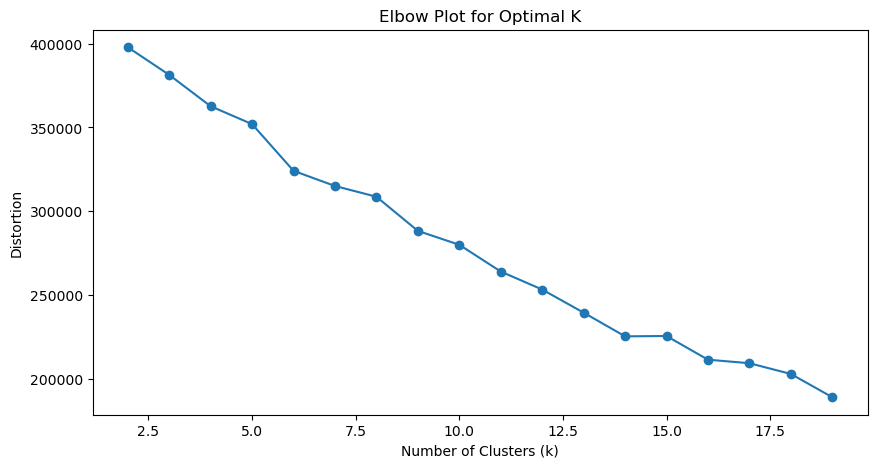

In [8]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)
    distorsions.append(kmeans.inertia_)

# Plot elbow method for optimal k
plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distorsions, '-o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.title("Elbow Plot for Optimal K")
plt.show()
